# A complete Machine Learning PipeLine

- Intoroduction to supervised Machine Learning
    - What is machine learning?
    - Types of Machine learning Algorithms
    - Supervised Machine Learning
    - Classification vs Regression
    - Machine Learning Pipeline
    
    
- Predict the onset of diabetes based on diagnostic measures

    - Data Preparing
        - Analyze Data
        - Descriptive Statitics
        - Data Visualization
    - Outliers investigation
        - Outliers investigation Single Feature
        - Outliers investigation Pairs
        
    - Evaluate Algorithms: Baseline
    - Feature Engineering 
        - Data Preprocessig
            - Standard Scaler
            - MinMax Scaler
        - Remove OutlierS
    - Feature Selection
        - Corrolation
        - Feature Importance
    - Ensemble Methods    
        - Algortithm Tuning
        - Voting Ensemble
        - Error Corrolation
        - Stacking
 
 -  Deploying Machine Learning Models
 
 - Monitoring ML Models
    
    


# Intoroduction to supervised Machine Learning:

## What is machine learning?
Task **T**: image classification problem of classifying dogs and cats 

Experience **E**: I would give a ML algorithm a
bunch of images of dogs and cats

The performance measure **P**: the ML algorithm could learn
how to distinguish a new image as being either a dog or cat.

Machine learning (Machine Learning by Tom Mitchell):

**A computer program is said to learn from experience **E** with
respect to some class of tasks **T** and performance measure **P**,
if its performance at tasks in **T**, as measured by **P**, Improves
with experience **E**.**

## Types of Machine learning Algorithms

1. Supervised Learning: Input data is called training data and
has a known label or result.
Ex: Spam/not-spam or a stock price at a time.

2. Unsupervised Learning: Input data is not labeled and does
not have a known result.
EX: Grouping customers by purchasing behavior

3. Semi-Supervised Learning: Input data is a mixture of labeled and
unlabeled examples.
EX: a photo archive where only some of the
images are labeled, (e.g. dog, cat, person) and the majority are
unlabeled.

4. Reinforcement Learning: a goal-oriented learning based
on interaction with environment. Autonomous cars.

## Supervised Machine Learning
1. Regression: Linear Regression, Logistic Regression

2. Instance-based Algorithms: k-Nearest Neighbor (KNN)

3. Decision Tree Algorithms: CART

4. Bayesian Algorithms: Naive Bayes

5. Ensemble Algorithms: eXtreme Gradient Boosting

6. Deep Learning Algorithms: Convolution Neural Network

## Classification vs Regression
**Classification** predicting a label .vs. **Regression** predicting a quantity.

## Classification Algorithms Examples:
- Linear: Linear Regression, Logistic Regression
- Nonlinear: Trees, k-Nearest Neighbors
- Ensemble:
    - Bagging: Random Forest
    - Boosting:  AdaBoost


## Machine Learning Pipeline:

- Define Problem
    - ML type of problem

- Prepare Data
    - Data Visualization methos ...
    - Data Selection
    - Feature Selection methods ..
    - Feature Engineering methods ..
    - Data Transormation methods ..

- ML Algorithms
    - Test Harness ...
    - Perform Measure ...
    - Evaluate accuracy of different algorithms

- Improve Results 
    - Algorithms Turning methids
    - ensemble methods

- Present Results
    - Save the model

- Testing the Model

- Deployment

- Monitoring

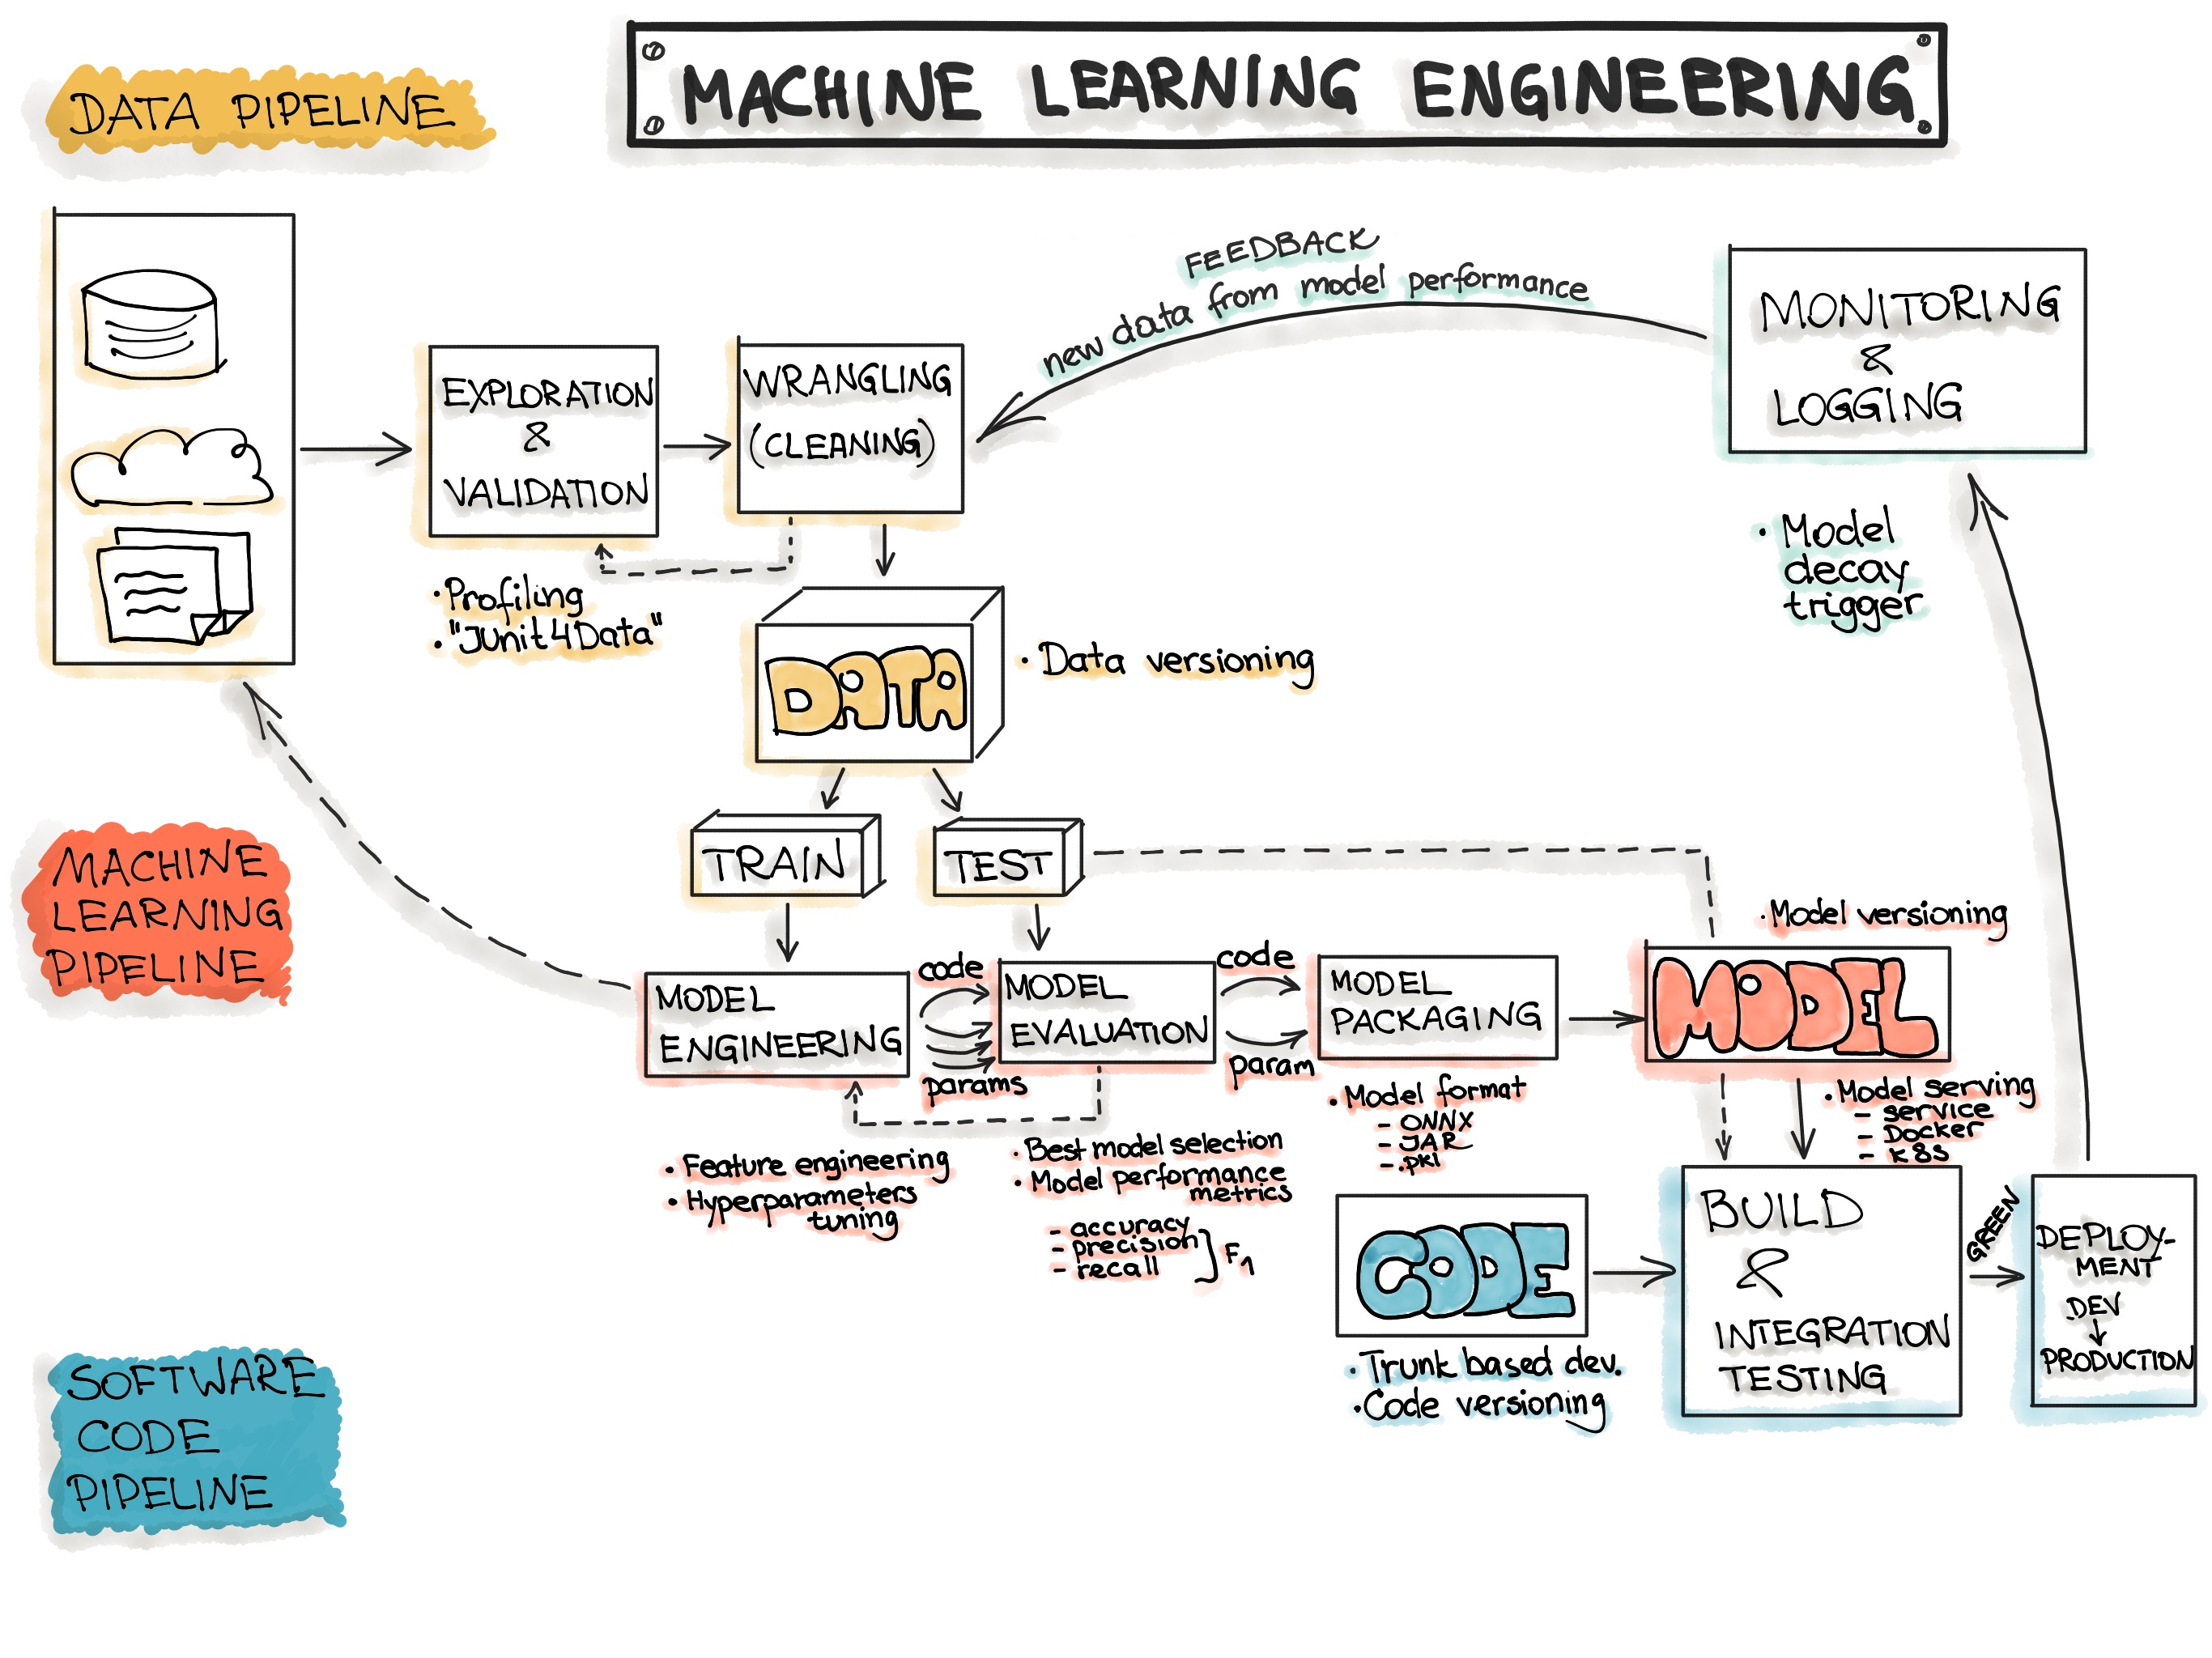

In [1]:
from IPython.display import Image
Image(filename='ml-engineering.jpg')

# Problem:
## [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
### Predict the onset of diabetes based on diagnostic measures

<br>

- In this project, a classification model will be made using the Pima Indians Diabetes data set. Diabetes is a group of metabolic disorders in which long-term high blood sugar levels are seen. High blood sugar symptoms include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications may include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcer, and eye damage.
<br>

- This dataset was originally from the National Institute of Diabetes, Digestive and Kidney Diseases. The purpose of the dataset is to diagnostically predict whether a patient has diabetes based on the specific diagnostic measures included in the data set. Various restrictions have been imposed on the selection of these samples from a larger database.
<br>

- About this data, all the patients here are women who are at least 21 years old of Pima Indian heritage. The data set consists of 768 observation units and 9 variables. These variables are; pregnancy, glucose, blood pressure, skin thickness, insulin, body mass index, diabetes pedigree, age and outcome. After the exploratory data analysis on the data set is completed, the machine learning model will be set up. For this, supervised learning algorithms will be used.

**Attribute Information:**

1. <b>Pregnancies:</b>&nbsp; Number of times pregnant
2. <b>Glucose:</b>&nbsp; 2 hours Plasma glucose concentration in an oral glucose tolerance test
3. <b>BloodPressure:</b>&nbsp; Diastolic blood pressure (mm Hg)
4. <b>SkinThickness:</b>&nbsp; Triceps skin fold thickness (mm)
5. <b>Insulin:</b>&nbsp; 2-Hour serum insulin (mu U/ml)
6. <b>BMI:</b>&nbsp; Body mass index (weight in kg/(height in m)^2)
7. <b>DiabetesPedigreeFunction:</b>&nbsp; A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
8. <b>Age:</b>&nbsp; Age (years)
9. <b>Outcome:</b>&nbsp; Class variable. Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).

# My Part:

The business understanding is that we must be able to produce a model that is reasonably accurate enough to predict whether a patient has diabetes or not. Given that this is a life-threatening disease, we want our model to be relatively sensitive, so that it can miss less false negatives (so that if there is a chance that they have it, they will get notified). We do not want precision, as minimizing the number of false positives is not as important as minimizing the number of false negatives. 

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [3]:
# 2. Data Preparing 

In [4]:
# Loading Data
df = pd.read_csv('https://raw.githubusercontent.com/aiplanethub/Machine_Learning_Bootcamp/master/ML_Problem_Solving/diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
np.round(df.describe(),1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count        768.0    768.0          768.0          768.0    768.0  768.0   
mean           3.8    120.9           69.1           20.5     79.8   32.0   
std            3.4     32.0           19.4           16.0    115.2    7.9   
min            0.0      0.0            0.0            0.0      0.0    0.0   
25%            1.0     99.0           62.0            0.0      0.0   27.3   
50%            3.0    117.0           72.0           23.0     30.5   32.0   
75%            6.0    140.2           80.0           32.0    127.2   36.6   
max           17.0    199.0          122.0           99.0    846.0   67.1   

       DiabetesPedigreeFunction    Age  Outcome  
count                     768.0  768.0    768.0  
mean                        0.5   33.2      0.3  
std                         0.3   11.8      0.5  
min                         0.1   21.0      0.0  
25%                         0.2   24.0      0.0  
50%                         0.4   29.0      0.0  
75%                         0.6   41.0      1.0  
max                         2.4   81.0      1.0

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### 2.2. Data Visualization
let's take look at our data in the most raw shape.
I really recommend scatter plot because we can get the idea of our data without any manipulation

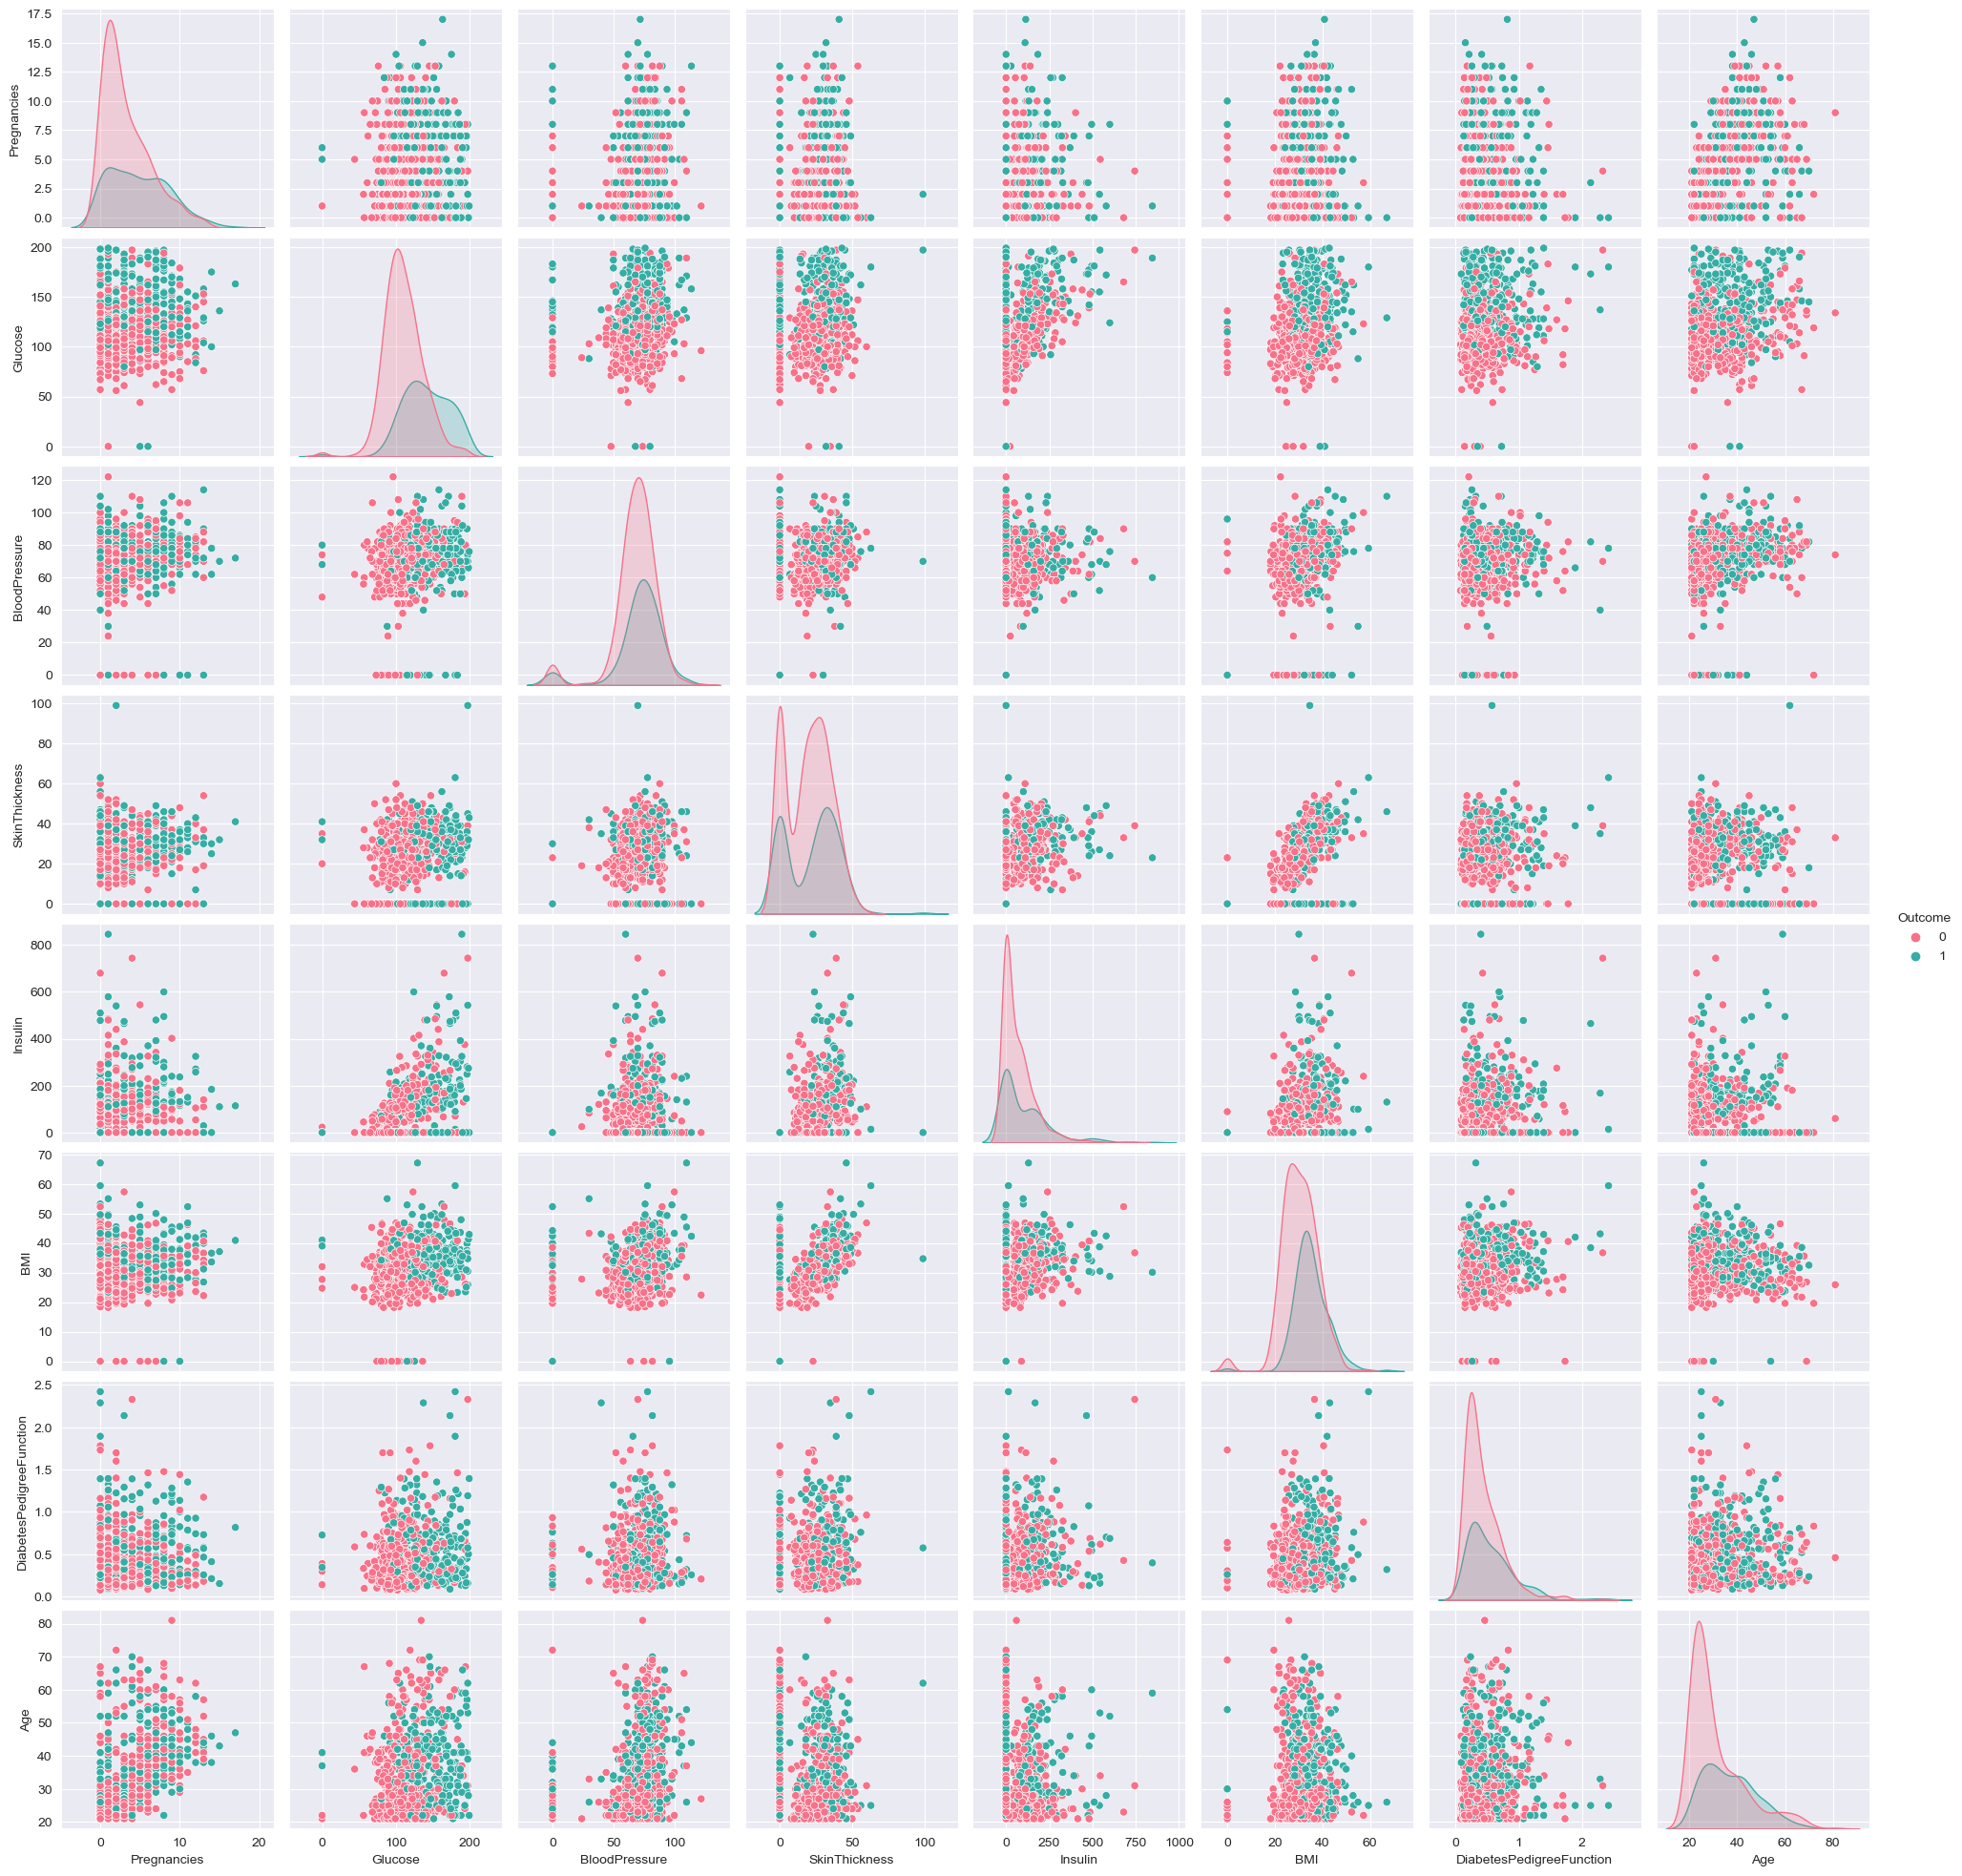

In [9]:
 g = sns.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

Let's see for example pregnency distribution

In [10]:

fig = px.histogram(df, x="Pregnancies")
fig.show()

17 times pregnancy is a little bite strange! Is it outlier ?

Let's investagate each fearure distribution.

A fundamental task in many statistical analyses is to characterize
the location and variability of a data set. A further
characterization of the data includes **skewness and kurtosis**.

**Skewness** is a measure of symmetry, or more precisely, the lack
of symmetry. A distribution, or data set, is symmetric if it
looks the same to the left and right of the center point.A general guideline for skewness is that if the number is **greater than +1 or lower than –1, this is an indication of a substantially skewed distribution**.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case. For kurtosis, the general guideline is that if the number is **greater than +1, the distribution is too peaked**. Likewise, a kurtosis of **less than –1 indicates a distribution that is too flat**.

In [11]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=1
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[feature]))
        print("{0} var  : ".format(target), np.var(df[feature]))
        print("{0} skew (should be 0 for normal distribution) : ".format(target), skew(df[feature]))
        print("{0} kurt (should be 0 for normal distribution) : ".format(target), kurtosis(df[feature]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,feature)

In [12]:
plotBarCat(df,df_name[0],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Pregnancies mean :  3.8450520833333335
Pregnancies var  :  11.33927239312061
Pregnancies skew (should be 0 for normal distribution) :  0.8999119408414357
Pregnancies kurt (should be 0 for normal distribution) :  0.15038273760948462
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [14]:
plotBarCat(df,df_name[1],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Glucose mean :  120.89453125
Glucose var  :  1020.9172617594401
Glucose skew (should be 0 for normal distribution) :  0.17341395519987735
Glucose kurt (should be 0 for normal distribution) :  0.6288133337300685
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [15]:
plotBarCat(df,df_name[2],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BloodPressure mean :  69.10546875
BloodPressure var  :  374.1594492594401
BloodPressure skew (should be 0 for normal distribution) :  -1.8400052311728738
BloodPressure kurt (should be 0 for normal distribution) :  5.138690662525438
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [16]:
plotBarCat(df,df_name[3],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
SkinThickness mean :  20.536458333333332
SkinThickness var  :  254.14189995659854
SkinThickness skew (should be 0 for normal distribution) :  0.109158762323673
SkinThickness kurt (should be 0 for normal distribution) :  -0.5244944887652805
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df,df_name[4],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Insulin mean :  79.79947916666667
Insulin var  :  13263.886874728778
Insulin skew (should be 0 for normal distribution) :  2.2678104585131753
Insulin kurt (should be 0 for normal distribution) :  7.159574916971424
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
plotBarCat(df,df_name[5],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BMI mean :  31.992578124999977
BMI var  :  62.0790464782714
BMI skew (should be 0 for normal distribution) :  -0.42814327880861786
BMI kurt (should be 0 for normal distribution) :  3.2612574203612645
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [19]:
plotBarCat(df,df_name[6],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
DiabetesPedigreeFunction mean :  0.4718763020833327
DiabetesPedigreeFunction var  :  0.10963569693840873
DiabetesPedigreeFunction skew (should be 0 for normal distribution) :  1.9161592037386292
DiabetesPedigreeFunction kurt (should be 0 for normal distribution) :  5.550792047551203
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [20]:
plotBarCat(df,df_name[7],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Age mean :  33.240885416666664
Age var  :  138.12296379937058
Age skew (should be 0 for normal distribution) :  1.127389259531697
Age kurt (should be 0 for normal distribution) :  0.6311769413798585
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [21]:
plotBarCat(df,df_name[8],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055383
Outcome skew (should be 0 for normal distribution) :  0.6337757030614577
Outcome kurt (should be 0 for normal distribution) :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [13]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [14]:
PlotPie(df, 'Outcome')

In [ ]:
pio.renderers.default = “plotly_mimetype+notebook”

In the case of classification problem we alwyas need to check the target distribution.
If the distribution of target is not balanced, we must treat our data more carefully.
For example we can use several methods to resample our data. We are not resampling the data in this tutorial. In addition, we need to use stratified method in our validation in order to keep the same distribution in our train and test data set.   

## 2.3.1 Outliers investigation

In [15]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")
    


In [25]:
OutLiersBox(df,df_name[0])

In [26]:
OutLiersBox(df,df_name[1])

In [27]:
OutLiersBox(df,df_name[2])

In [28]:
OutLiersBox(df,df_name[3])

In [29]:
OutLiersBox(df,df_name[4])

In [30]:
OutLiersBox(df,df_name[5])

In [31]:
OutLiersBox(df,df_name[6])

In [32]:
OutLiersBox(df,df_name[7])

## 2.3.2. Outliers investigation Pairs

In [33]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


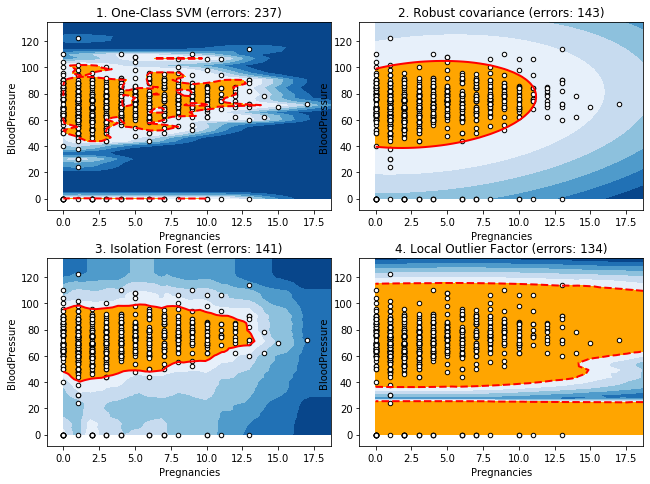

In [34]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

# 3.1. Evaluate Algorithms: Baseline

<a href="https://ibb.co/bWRCsS"><img src="https://preview.ibb.co/f7UAe7/validation.png" alt="validation" border="0" /></a>

- We usually divide the data into train and test set. We will not touch test set until the end of the computation and the final perpormance evaluation. Then, we divide the train set into train and validation sets. We use the validation data set for hyper-parameter tuning. 

- Traditional train-test method suffer from high variance test problem. It means that by changing the test set the result of the prediction changes. To over come this problem we use k-fold validation method in our train and validation set.

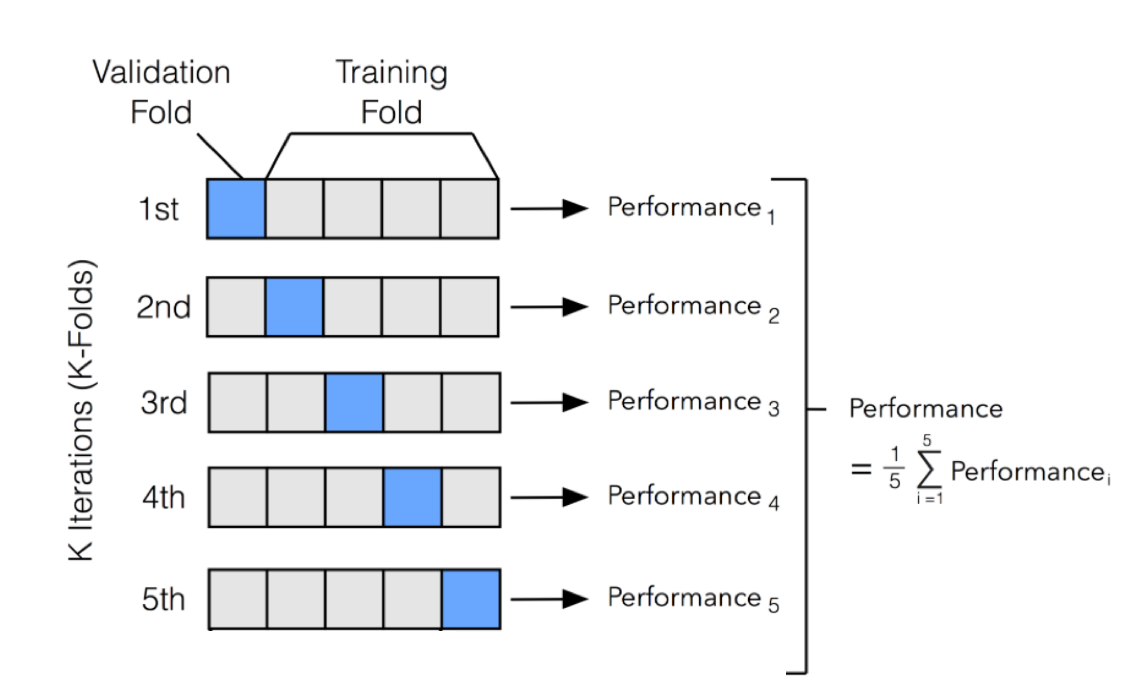

In [35]:
Image(filename='kfolds.png')

In [17]:
# Import libraries

from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

let's make train-validation and test data sets.
- Note that stratified sampling method is used so that all classes are proportionately represented in each of the data sets.

In [18]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

## Initial Algorithms to fit the data on

In [19]:
# Initial Algorithms to fit the data on
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [23]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [21]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [24]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.756897 (0.036000)
LDA: 0.760405 (0.033932)
KNN: 0.698004 (0.046531)
CART: 0.691016 (0.050249)
NB: 0.743103 (0.036788)
SVM: 0.743134 (0.041095)
AB: 0.755233 (0.054116)
GBM: 0.757048 (0.031223)
RF: 0.751906 (0.042271)
ET: 0.746612 (0.035150)


In [25]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [26]:
basedLineScore = ScoreDataFrame(names,results).sort_values(by="Score", ascending=False)
basedLineScore

Model   Score
1   LDA  0.7604
7   GBM  0.7570
0    LR  0.7569
6    AB  0.7552
8    RF  0.7519
9    ET  0.7466
4    NB  0.7431
5   SVM  0.7431
2   KNN  0.6980
3  CART  0.6910

# Feature Engineering
## 4.1. Data Preprocessig

Numerical features preprocessing is different for tree-based and non-tree-based models.

1) Usually:
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling 

2) Most Often used preprocessing methods are:
- MinMax scaler to [0,1]
- Standard Scaler to mean = 0 and std =1
- Rank (Not used in this tutorial)
- Using np.log(1+data),  np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

Sometime scaling might help to improve the prediction of tree based model, so let's see

### 4.1.2. Standard

In [28]:
models = GetScaledModel('standard') # standardize
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.762160 (0.031231)
standardLDA: 0.760405 (0.033932)
standardKNN: 0.713612 (0.050130)
standardCART: 0.690835 (0.052179)
standardNB: 0.743103 (0.036788)
standardSVM: 0.755172 (0.025333)
standardAB: 0.755233 (0.054116)
standardGBM: 0.748336 (0.032648)
standardRF: 0.751724 (0.037163)
standardET: 0.727344 (0.045732)


Model   Score         Model   Score
1   LDA  0.7604   standardLDA  0.7604
7   GBM  0.7570   standardGBM  0.7483
0    LR  0.7569    standardLR  0.7622
6    AB  0.7552    standardAB  0.7552
8    RF  0.7519    standardRF  0.7517
9    ET  0.7466    standardET  0.7273
4    NB  0.7431    standardNB  0.7431
5   SVM  0.7431   standardSVM  0.7552
2   KNN  0.6980   standardKNN  0.7136
3  CART  0.6910  standardCART  0.6908

### 4.1.2. MinMax

In [29]:
models = GetScaledModel('minmax') # normalize
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.762129 (0.030495)
minmaxLDA: 0.760405 (0.033932)
minmaxKNN: 0.713612 (0.049576)
minmaxCART: 0.701210 (0.056239)
minmaxNB: 0.743103 (0.036788)
minmaxSVM: 0.770901 (0.031363)
minmaxAB: 0.755233 (0.054116)
minmaxGBM: 0.751875 (0.033763)
minmaxRF: 0.748306 (0.030782)
minmaxET: 0.743073 (0.028499)


Model   Score         Model   Score       Model   Score
1   LDA  0.7604   standardLDA  0.7604   minmaxLDA  0.7604
7   GBM  0.7570   standardGBM  0.7483   minmaxGBM  0.7519
0    LR  0.7569    standardLR  0.7622    minmaxLR  0.7621
6    AB  0.7552    standardAB  0.7552    minmaxAB  0.7552
8    RF  0.7519    standardRF  0.7517    minmaxRF  0.7483
9    ET  0.7466    standardET  0.7273    minmaxET  0.7431
4    NB  0.7431    standardNB  0.7431    minmaxNB  0.7431
5   SVM  0.7431   standardSVM  0.7552   minmaxSVM  0.7709
2   KNN  0.6980   standardKNN  0.7136   minmaxKNN  0.7136
3  CART  0.6910  standardCART  0.6908  minmaxCART  0.7012

As we can see, the standarscaler and MinMax Scaler have an effect on non tree models. The prediction results seems to have improved. 

## 4.2. Remove Outliers

let's remove outliers and see how it impacts the prediction

In [30]:
df_t = df.copy()
df_t_name = df_t.columns

In [31]:
def RemoveOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and the outliers are: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features ".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

### Feature 0

In [33]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [34]:
df_clean = RemoveOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and the outliers are: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features 


### Feature 1

In [35]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [36]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 5 and the outliers are: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features 


### Feature 2

In [37]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [38]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and the outliers are: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features 


### Feature 3

In [39]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [40]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and the outliers are: [99]
New dataset with removed outliers has 713 samples with 9 features 


### Feature 4

In [57]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [58]:
df_clean = RemoveOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

Number of outliers (inc duplicates): 27 and the outliers are: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features 


### Feature 5

In [59]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [60]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 10 and the outliers are: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features 


### Feature 6

In [61]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [62]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and the outliers are: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features 


### Feature 7

In [63]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [65]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 11 and the outliers are: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features 


**Cleaning Report**

In [67]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 76, 1: 692}


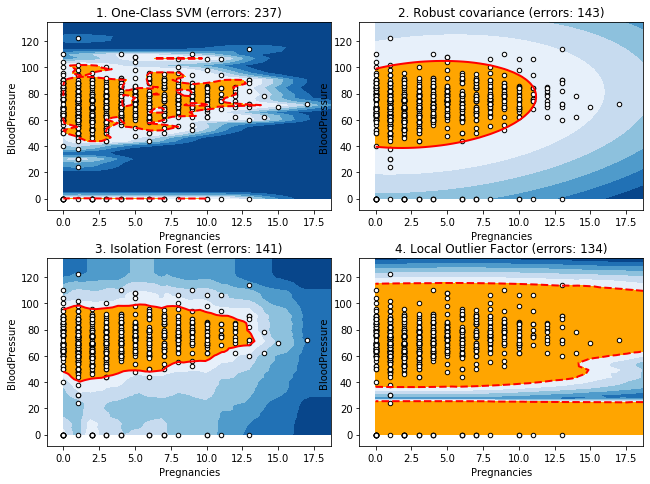

In [68]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 64, 1: 572}


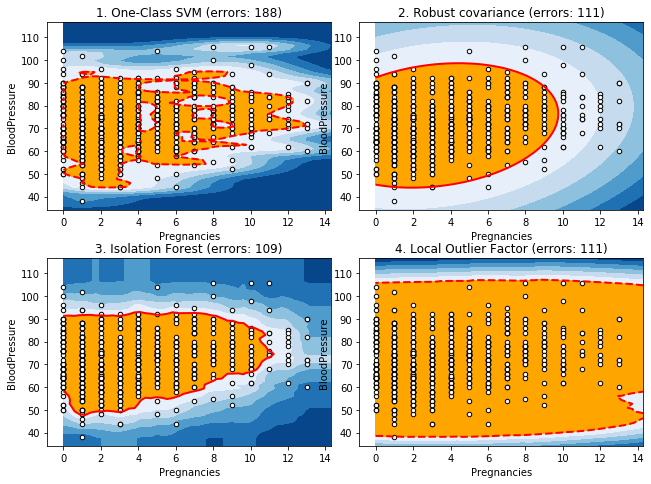

In [69]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

## Comparing the accuracy of models after cleaning

In [70]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

In [71]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.775798 (0.040042)
minmaxLDA: 0.782181 (0.044073)
minmaxKNN: 0.744105 (0.062750)
minmaxCART: 0.692066 (0.079658)
minmaxNB: 0.759131 (0.047747)
minmaxSVM: 0.763298 (0.040902)
minmaxAB: 0.712899 (0.031326)
minmaxGBM: 0.754920 (0.045778)
minmaxRF: 0.765293 (0.046003)
minmaxET: 0.758998 (0.049157)


Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7552    standardLR  0.7622    minmaxLR  0.7621    minmaxLR  0.7758
1   LDA  0.7604   standardLDA  0.7604   minmaxLDA  0.7604   minmaxLDA  0.7822
2   KNN  0.6980   standardKNN  0.7136   minmaxKNN  0.7136   minmaxKNN  0.7441
3  CART  0.6944  standardCART  0.7064  minmaxCART  0.6962  minmaxCART  0.6921
4    NB  0.7431    standardNB  0.7431    minmaxNB  0.7431    minmaxNB  0.7591
5   SVM  0.7431   standardSVM  0.7552   minmaxSVM  0.7709   minmaxSVM  0.7633
6    AB  0.7552    standardAB  0.7552    minmaxAB  0.7552    minmaxAB  0.7129
7   GBM  0.7536   standardGBM  0.7501   minmaxGBM  0.7570   minmaxGBM  0.7549
8    RF  0.7310    standardRF  0.7484    minmaxRF  0.7501    minmaxRF  0.7653
9    ET  0.7413    standardET  0.7431    minmaxET  0.7466    minmaxET  0.7590

It can be seen that the prediction is improving

## 4.3. Feature Selection
Feature selection is also called variable selection or attribute selection.
It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

### 4.3.1. Correlation

If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.  

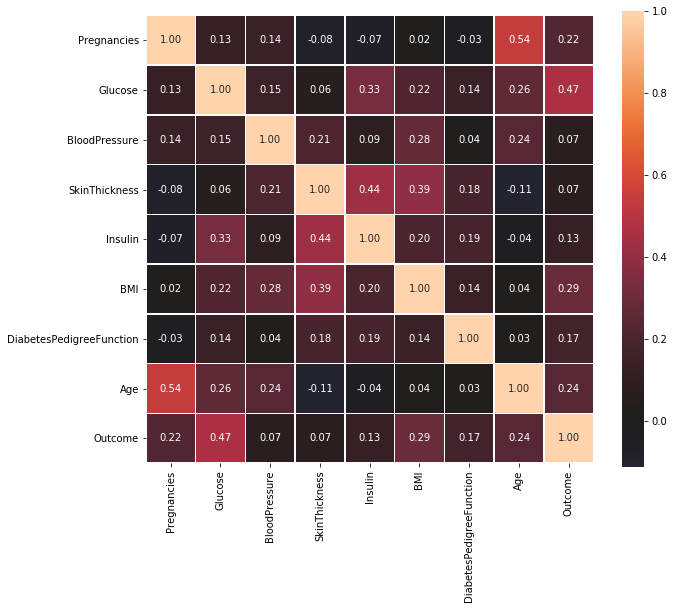

In [72]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There are not many strongly correlated features in this data set.

## 4.3.2.Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

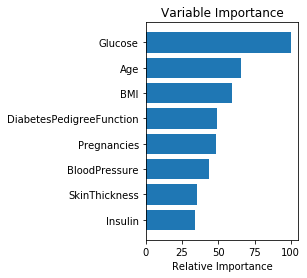

In [73]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [74]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [75]:
df_feature_imp_name = df_feature_imp.columns

In [76]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [77]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.783424 (0.044573)
minmaxLDA: 0.781670 (0.043951)
minmaxKNN: 0.757108 (0.052171)
minmaxCART: 0.690563 (0.047664)
minmaxNB: 0.781730 (0.046205)
minmaxSVM: 0.790260 (0.034698)
minmaxAB: 0.755414 (0.041720)
minmaxGBM: 0.755354 (0.042918)
minmaxRF: 0.771083 (0.030910)
minmaxET: 0.769328 (0.028204)


Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7552    standardLR  0.7622    minmaxLR  0.7621    minmaxLR  0.7758   
1   LDA  0.7604   standardLDA  0.7604   minmaxLDA  0.7604   minmaxLDA  0.7822   
2   KNN  0.6980   standardKNN  0.7136   minmaxKNN  0.7136   minmaxKNN  0.7441   
3  CART  0.6944  standardCART  0.7064  minmaxCART  0.6962  minmaxCART  0.6921   
4    NB  0.7431    standardNB  0.7431    minmaxNB  0.7431    minmaxNB  0.7591   
5   SVM  0.7431   standardSVM  0.7552   minmaxSVM  0.7709   minmaxSVM  0.7633   
6    AB  0.7552    standardAB  0.7552    minmaxAB  0.7552    minmaxAB  0.7129   
7   GBM  0.7536   standardGBM  0.7501   minmaxGBM  0.7570   minmaxGBM  0.7549   
8    RF  0.7310    standardRF  0.7484    minmaxRF  0.7501    minmaxRF  0.7653   
9    ET  0.7413    standardET  0.7431    minmaxET  0.7466    minmaxET  0.7590   

        Model   Score  
0    minmaxLR  0.7834  
1   minmaxLDA  0.7817  
2   minmaxKNN  0.7571  
3  minmaxCART  0.6906  
4    minmaxNB  0.7817  
5   minmaxSVM  0.7903  
6    minmaxAB  0.7554  
7   minmaxGBM  0.7554  
8    minmaxRF  0.7711  
9    minmaxET  0.7693

We still could improve the prediction 

# 5. Algortithm Tuning

In [78]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [79]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

<img src="https://image.ibb.co/cQh2sS/1_ZTl_Qm_WRcr_Nq_L_n_Lnx6_GJA.png" alt="1 ZTl Qm WRcr Nq L n Lnx6 GJA" border="0" />

In [81]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

In [82]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    
        

## 5.1.Logistic Regression
- C : Regularization value, the more, the stronger the regularization(double). 
- RegularizationType: Can be either "L2" or “L1”. Default is “L2”. 

In [83]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [84]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [85]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [86]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.828125


## 5.2. KNN
- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [87]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)


In [88]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))


Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125


## 5.3. SVC 
- C: The Penalty parameter C of the error term. 
- Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [89]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [90]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375


## 5.4. Decision Tree
- max_depth:  Maximum depth of the tree (double).
- row_subsample: Proportion of observations to consider (double).
- max_features: Proportion of columns (features) to consider in each level (double).

In [91]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [92]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [93]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.767544 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
prediction on test set is: 0.765625


## 5.5 AdaBoostClassifier
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
- n_estimators: Number of trees to build.

In [94]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [95]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))


Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


## 5.6 GradientBoosting

In [96]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [97]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


 # 6. Ensemble Methods

## 6.1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [98]:
from sklearn.ensemble import VotingClassifier

In [99]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [100]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [101]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators, voting ='hard')
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.802692075015124
Accuracy on test: 0.828125


## Beyond Voting

In [102]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Correlation

In [103]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [104]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.


[MLENS] backend: threading


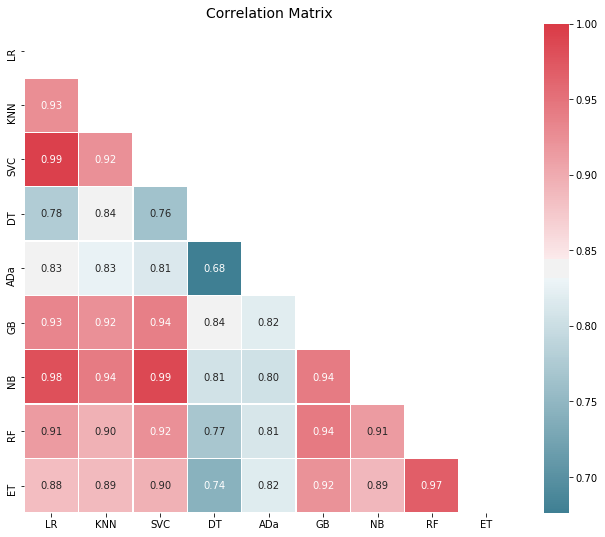

In [105]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)


Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

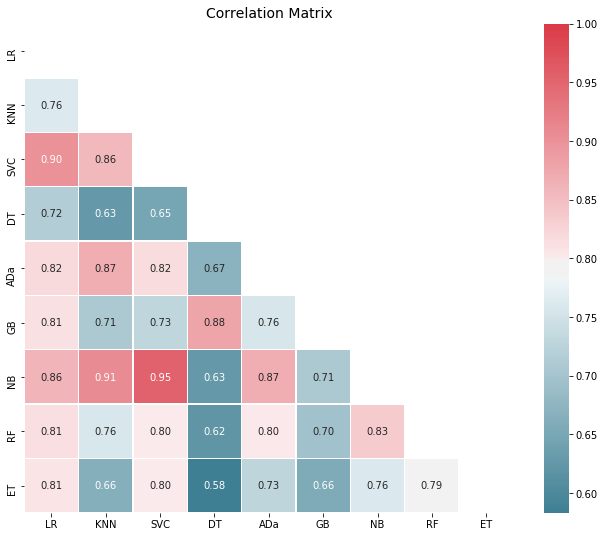

In [106]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

# 6.3 Stacking

In [107]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [ ]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))



Fitting 2 layers
Processing layer-1             

In [ ]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [ ]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())

Other ensembling techniques include: 

- Blending
- Bagging
- Boosting

**Notes:**

- Now you can do more feature engineering 
- Tune better 
- Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
- Stack more diverse model
- Use your creativity 

# 6.4  Deploying machine learning models

#### Deploying machine learning models into production is the next step of the Machine Learning pipeline.

The Machine Learning model shows its full value when the company that produced it is generating predictions using fully integrated API and feed with real live input data. 

Taking an ML Model From Desktop POC to Running in Production Implies a **Massive, Continuous Effort**.

**Failures of putting the model into productions are one of the most frequent reasons why machine learning projects fail.**

### 6.4.1  Architecture

Training machine learning models and putting them into production is relatively easy and cheap. The cost of maintaining them properly into production is much harder. All traditional software maintenance issues remain present in Machine Learning systems.

- There are several types of architectures that serve predictions using a trained model.
- Serving through REST API and online learning are some of them. 
- Architecture type depends on the business needs and technical specifications of the platform where the ML module is hosted

### 6.4.2 Building Reproducible Machine Learning Pipeline 

The machine learning pipeline can be implemented in several ways. 

They can be classified into procedural programming using functions for each step in the pipeline, writing our pipeline code using OOP, and using third-party pipeline implementations.

Now, to build a reproducible Machine Learning pipeline means that the results of each step in the pipeline can be reproduced when it is executed again.

The list of the steps executed to build a machine learning project are:

- Collecting data
- Data analysis (which features are categorical and which are continues)
- Feature engineering
- Feature selection
- Training the machine learning model, and
- Model deployment


To ensure the reproducibility of the whole pipeline, we need to ensure it in all the steps. We can exclude step 2, which is done once in the experimental phase.

##### One of the biggest challenges in the building models with reproducible results is to reproduce the data collection phase when we extract training data. 

### 6.4.3 Testing the Machine Learning Pipeline

An essential part of machine learning pipeline implementation is testing it. 

Industry-standard for testing Python code is pytest library. A useful extension to pytest is tox tool. It is a Python virtual environment manager that allows us to execute tests in different Python setups.

### 6.4.4 Implementing Differential Tests

- They perform a comparison in the performances of the previous model version and the new one, having the same input starting with training data and including predictions for the same feature values.
- We can implement them using pytest library as a built-in feature.

### 6.4.5 Testing New Models Before Releasing Into Production

- New releases of trained Machine Learning models in the production environment should be tested for an extended period (a few months!), before putting it officially into production.
- Also known as <b>Shadow Deployment</b> or <b>Dark Launch</b> (named by Google)

- There are two possibilities to implement Shadow Deployments:
    - Application level
    - Infrastructure level

### 6.4.6 Dealing With Randomness in Machine Learning Pipeline

In [ ]:
# Example for reproducible randomness with numpy
from numpy.random import seed
seed(0)

#  TensorFlow
from tensorflow import set_random_seed
set_random_seed(0)

#  PyTorch
import torch
torch.manual_seed(0)

#  PyTorch # CUDA and cuDNN modules
SEED = 0
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### 6.4.7 Serving the model with REST API

- REST API is the most frequently used way to expose the trained model that generates predictions.
<br>

- Many Python libraries that help in exposing endpoints that generate predictions.

### 6.4.8 Deployment Methods

- Generally speaking, the preferred method for serving Machine Learning models is via Docker images.
<br>

- They are easy to be versioned, deployed, and orchestrated through various methods (Swarm, Kubernetes)

#### 6.4.8.1 Serving Deep Learning Models with Tensorflow Serving and TorchServe

- <b>TensorFlow serving :</b>   Exists since TensorFlow version 1 and is a mature product.
<br>

- <b>TorchServe :</b>           Flexible and easy to use tool for serving PyTorch models. Is still in the experimental phase!

#### 6.4.8.2 Kuberflow

- The [Kubeflow](https://www.kubeflow.org/docs/about/kubeflow/) project is dedicated to making deployments of machine learning (ML) workflows on Kubernetes simple, portable and scalable. Our goal is not to recreate other services, but to provide a straightforward way to deploy best-of-breed open-source systems for ML to diverse infrastructures. Anywhere you are running Kubernetes, you should be able to run Kubeflow. 
<br>

- A new kid on the block! This is a new tool that hasn’t gather public interest yet but is worth to be considered when planning the Machine Learning pipeline and deployments.



### 6.5 Monitoring your Machine Learning Model

- Monitoring your model can help you understand how accurate your predictions are over time.
<br>

- <b>Why monitor your Model?</b>
    - The relationship between your model and the input data changes
    - The distribution of your data changes such that your model is less representative
    - Change in measurements and/or user base which changes the underlying meaning of variables
<br>

    - <b>Drift</b>
        - phenomenon of changes in the statistical properties of your data that causes your predictions to degrade over time. In other words, since data is always changing, drift occurs naturally.
        - Drift is often referred to as concept drift, model drift, or data drift
        - Blindly retraining a model could lead to more costs, time waisted, or even a worse model. 
        - By monitoring your model you can be more precise in deciding the best method and time for retraining.
- <b>Monitoring</b>
    - Monitor Predictions
        - Distribution of predictions
        - Prediction probabilities
        
        **NOTE:** If you want to compare distributions, then we are typically looking at statistical tests such as the student’s t-test or the non-parametric Kolmogorov Smirnov. 


    - Monitor Input
        - Distribution of features
        - Outlier detection
     
    - Human Monitoring
        - If a monitored prediction is way off even though it had a probability of over 90%, then it would be nice if these exceptions are looked over by a human.

- <b>Shadow mode</b>
    - Shadow mode is a technique where you run production data through a newly trained model without giving the predictions back to the user.
    - Shadow mode allows you to simultaneously run both models while testing the performance of the newer model in a production environment. 